In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model


In [2]:
df = pd.read_csv('../processed_data/master_dataset.csv')

In [3]:
unique_countries = df['CountryName'].unique()

In [4]:
df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

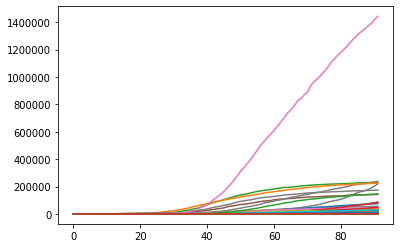

In [5]:
# visualize cases
for country in unique_countries: 
    ts_data = np.array(df['ConfirmedCases'][df['CountryName'] == country])
    plt.plot(np.arange(len(ts_data)), ts_data)

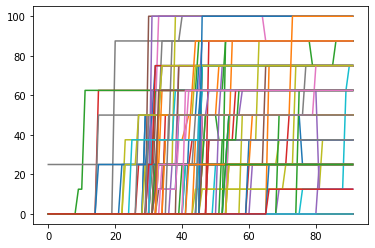

In [6]:
for country in unique_countries: 
    ts_data = np.array(df['EconomicSupportIndexForDisplay'][df['CountryName'] == country])
    if None in ts_data:
        print("f")
    plt.plot(np.arange(len(ts_data)), ts_data)

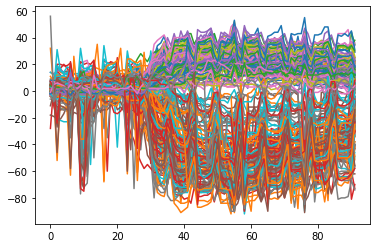

In [7]:
# how does govt policy impact actual social distancing? 

for country in unique_countries: 
    ts_data = np.array(df['residential_percent_change_from_baseline'][df['CountryName'] == country])
    plt.plot(np.arange(len(ts_data)), ts_data)
    
    # workplaces_percent_change_from_baseline
    
    ts_data = np.array(df['workplaces_percent_change_from_baseline'][df['CountryName'] == country])
    plt.plot(np.arange(len(ts_data)), ts_data)

In [8]:
df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

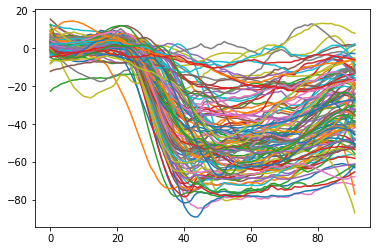

In [10]:
df = pd.read_csv('../processed_data/master_dataset_smooth.csv')
df['smooth_avg_percent_change_from_baseline'] = (df['smooth_retail_and_recreation_percent_change_from_baseline']+df['smooth_grocery_and_pharmacy_percent_change_from_baseline']+df['smooth_parks_percent_change_from_baseline']+df['smooth_transit_stations_percent_change_from_baseline']+df['smooth_workplaces_percent_change_from_baseline'])/5
for country in unique_countries: 
    ts_data = np.array(df['smooth_avg_percent_change_from_baseline'][df['CountryName'] == country])
    #ts_data = np.array(df['ConfirmedCases'][df['CountryName'] == 'Italy'])
    plt.plot(np.arange(len(ts_data)), ts_data)


In [13]:
# at what time did different governments act? 
df['avg_percent_change_from_baseline'] = (df['retail_and_recreation_percent_change_from_baseline']+df['grocery_and_pharmacy_percent_change_from_baseline']+df['parks_percent_change_from_baseline']+df['transit_stations_percent_change_from_baseline']+df['workplaces_percent_change_from_baseline'])/5

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

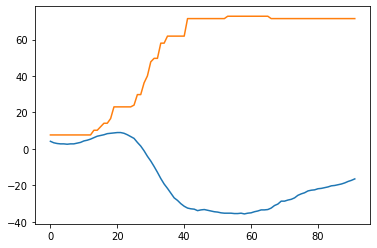

In [14]:
mobility_data = np.array(df['smooth_avg_percent_change_from_baseline'][df['CountryName'] == 'United States'])
govt_data = np.array(df['GovernmentResponseIndexForDisplay'][df['CountryName'] == 'United States'])
plt.plot(np.arange(len(mobility_data)), mobility_data)
plt.plot(np.arange(len(mobility_data)), govt_data)

In [ ]:
from scipy.optimize import curve_fit
import statsmodels.api as sm
def func(x, a, b):
    return a*((b)**x)

def fit(t, data):
    t = sm.add_constant(t)
    #y = np.log(np.add(data,1))
    y= np.log(np.add(1,data))
    mod = sm.OLS(y,t)
    res = mod.fit()
    a = res.params[0]
    b = res.params[1]
    return a,np.exp(b)

country_idx = np.where(df['CountryName'] == 'Sweden')[0]
y = df['ConfirmedCases'][country_idx].values
zero_days = len(y) - np.count_nonzero(y)
start_idx = zero_days
end_idx = len(y)-1
t = np.arange(np.count_nonzero(y)-1)
data = np.array(y[start_idx:end_idx]) 
a,b = fit(t,data)
print(a)
print(b)
print(data)
plt.plot(t, data)
plt.plot(t, func(t, a, b))

In [ ]:
# PERFORM A PARAMETRIC REGRESSION ON OUR DATASET

# find the date of the first case for every county

    
    

a_list = [] 
b_list = [] 
for country in unique_countries: 
    country_idx = np.where(df['CountryName'] == country)[0]
    #t = np.arange(len(master_df['date'][county_st_idx]))
    y = df['ConfirmedCases'][country_idx].values
    zero_days = len(y) - np.count_nonzero(y)
    start_idx = zero_days
    end_idx = len(y)-1
    t = np.arange(np.count_nonzero(y)-1)
    data = np.array(y[start_idx:end_idx]) 
    a,b = fit(t,data)
    a_list.append(a)
    b_list.append(b)

parameters_df = pd.DataFrame(columns = ['county_st', 'a','b']) #y = ab^t
parameters_df['county_st'] = unique_countries
parameters_df['a'] = a_list
parameters_df['b'] = b_list

In [ ]:
df.columns

In [ ]:
# how fast govt policies were implemented vs the avg decrease in transit

x = np.zeros(len(unique_countries))
y = np.zeros(len(unique_countries))
i = 0 
for country in unique_countries: 
    # find the first case 
    cases = np.array(df['ConfirmedCases'][df['CountryName'] == country])

    I = np.nonzero(cases)
    # the first index is necessary because the vector is within a tuple
    if len( I[0]) != 0:
        first_case_day = I[0][0]
    else:
        first_case_day = len(I)-1
    
    first_case_day = 0 
    
    # finding the first spike in economic support
    ts_data = np.array(df['StringencyIndexForDisplay'][df['CountryName'] == country])
    ts_data = ts_data - ts_data[0]
    I = np.nonzero(ts_data)
    # the first index is necessary because the vector is within a tuple
    if len( I[0]) != 0:

        first_non_zero_index_one = I[0][0]-first_case_day
    else:
        first_non_zero_index_one = len(I)-1-first_case_day
        
    
    ts_data = np.array(df['parks_percent_change_from_baseline'][df['CountryName'] == country])
    avg = np.mean(ts_data[first_case_day:])
    x[i] = first_non_zero_index_one
    y[i] = avg
    
    i+=1
    plt.xlabel('Govt reaction time to first case')
    plt.ylabel('Social Distancing efforts')
    plt.scatter(first_non_zero_index_one, avg)

# Create linear regression object
regr = linear_model.LinearRegression()

print(x.reshape(-1,1))
print(y.reshape(-1,1))
# Train the model using the training sets
regr.fit(x.reshape(-1,1), y)


plt.plot(x, regr.predict(x.reshape(-1,1)), color='blue', linewidth=3)



In [ ]:
df.columns

In [ ]:
# how fast govt policies were implemented vs the avg decrease in transit

x = np.zeros(len(unique_countries))
y = np.zeros(len(unique_countries))
i = 0 
for country in unique_countries: 
    # find the first case 
    cases = np.array(df['ConfirmedCases'][df['CountryName'] == country])

    I = np.nonzero(cases)
    # the first index is necessary because the vector is within a tuple
    if len( I[0]) != 0:
        first_case_day = I[0][0]
    else:
        first_case_day = len(I)-1
    
    first_case_day = 0 
    
    # finding the first spike in economic support
    ts_data = np.array(df['EconomicSupportIndexForDisplay'][df['CountryName'] == country])
    ts_data = ts_data - ts_data[0]
    I = np.nonzero(ts_data)
    # the first index is necessary because the vector is within a tuple
    if len( I[0]) != 0:

        first_non_zero_index_one = I[0][0]-first_case_day
    else:
        first_non_zero_index_one = len(I)-1-first_case_day
        
    
    ts_data = np.array(df['smooth_avg_percent_change_from_baseline'][df['CountryName'] == country])
    try:
        res = next(x for x, val in enumerate(ts_data) if val < -25)
    except:
        res = len(ts_data)
    res = res-first_case_day


    x[i] = first_non_zero_index_one
    y[i] = res
    
    i+=1
    plt.xlabel('Govt reaction time to first case')
    plt.ylabel('Time it takes to get to -25 decrease')
    plt.scatter(first_non_zero_index_one, res)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x.reshape(-1,1), y)


#plt.plot(x, regr.predict(x.reshape(-1,1)), color='blue', linewidth=3)

In [19]:
from lifelines import KaplanMeierFitter

In [20]:
df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

In [ ]:
# surival analysis on the probability that we DON'T hit 1000 cases over time from the first case 

# first split it into x plots and then calculate it

survival_threshold = 100
criteria ='C4_Restrictions on gatherings'
x = df[criteria].unique()

kmf = KaplanMeierFitter() 

criteria_type = x[~np.isnan(x)]
sorted_array = np.sort(criteria_type)
# [1, 2, 3, 4, 5, 6, 7]

# Reverse the sorted array
reverse_array = sorted_array[::-1]

visited_countries = np.array([])



for criterion in reverse_array:
    print(criterion)
    # get the countries that, at one point, implemented the criterion
    criterion_countries = df['CountryName'][df[criteria] == criterion].unique()
    
    # don't want to use the same country twice
    countries = [x for x in criterion_countries if x not in visited_countries]
    visited_countries = np.append(visited_countries, countries)

    print(countries)
    
    duration = np.array([])
    survival = np.array([])
    
    for country in countries: 
        cases = df['ConfirmedCases'][df['CountryName'] == country].to_numpy()
        
        I = np.nonzero(cases)
        # find the day of first case 
        if len( I[0]) != 0:
            first_case_day = I[0][0]
        else:
            first_case_day = len(I)-1
            print("no cases")
        cases = cases[first_case_day:]
        
        duration_country = np.arange(len(cases))
        survival_country = (cases > survival_threshold).astype(int)  # whether we are below the survival threshold
        
        
        duration = np.append(duration, duration_country)
        survival = np.append(survival, survival_country)
    kmf.fit(duration, survival,label='type '+str(criterion))
    kmf.plot()

plt.title(criteria)

        

In [ ]:
df.columns

In [ ]:
# surival analysis on the probability that we hit less than 30 % decrease 

# first split it into x plots and then calculate it

mobility_threshold = -25
criteria ='C8_International travel controls'
x = df[criteria].unique()

kmf = KaplanMeierFitter() 

criteria_type = x[~np.isnan(x)]
sorted_array = np.sort(criteria_type)
# [1, 2, 3, 4, 5, 6, 7]

# Reverse the sorted array
reverse_array = sorted_array[::-1]

visited_countries = np.array([])



for criterion in reverse_array:
    #print(criterion)
    # get the countries that, at one point, implemented the criterion
    criterion_countries = df['CountryName'][df[criteria] == criterion].unique()
    
    # don't want to use the same country twice
    countries = [x for x in criterion_countries if x not in visited_countries]
    visited_countries = np.append(visited_countries, countries) # comment this line if thats okay
    print(criterion)
    print(countries)
    duration = np.array([])
    survival = np.array([])
    
    for country in countries: 
        cases = df['ConfirmedCases'][df['CountryName'] == country].to_numpy()
        
        I = np.nonzero(cases)
        # find the day of first case 
        if len( I[0]) != 0:
            first_case_day = I[0][0]
        else:
            first_case_day = len(I)-1
            print("no cases")
        
        mobility = df['workplaces_percent_change_from_baseline'][df['CountryName'] == country].to_numpy()
        mobility = mobility[first_case_day:]
        
        duration_country = np.arange(len(mobility))
        survival_country = (mobility < threshold).astype(int)  # whether we are below the survival threshold
        
        #print(survival_country)
        
        duration = np.append(duration, duration_country)
        survival = np.append(survival, survival_country)
    kmf.fit(duration, survival,label='type '+str(criterion))
    kmf.plot()

plt.xlabel('Time from first case (days)')
plt.ylabel('P (mobility doesn\'t decrease by'+ str(threshold) +')')
plt.title(criteria)

In [170]:
from copy import copy 
import warnings
warnings.filterwarnings("ignore")
def kmf_mobility( criteria,threshold_type = 'mobility', threshold = -30, split_type = 'has_occurred'):    
    x = df[criteria].unique()

    kmf = KaplanMeierFitter() 

    criteria_type = x[~np.isnan(x)]
    sorted_array = np.sort(criteria_type)
    # [1, 2, 3, 4, 5, 6, 7]

    # Reverse the sorted array
    reverse_array = sorted_array[::-1]

    visited_countries = np.array([])
    
    fig = plt.figure(figsize = (7,3.5))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)  # create an axes object in the figure
    




    for criterion in reverse_array:
        # get the countries that, at one point, implemented the criterion

        criterion_countries = df['CountryName'][df[criteria] == criterion].unique()
        
        df_copy = df.copy() 

        # don't want to use the same country twice
        
        # median after the first case 
        if split_type == 'median':
            
            
            countries = np.array([])
            
            for country in df['CountryName'].unique():
                
                cases = df['ConfirmedCases'][df['CountryName'] == country].to_numpy()

                I = np.nonzero(cases)
                # find the day of first case 
                if len( I[0]) != 0:
                    first_case_day = I[0][0]
                # get the criterion data from the first day of cases
                country_data = df[criteria][df['CountryName'] == country].to_numpy()[first_case_day:]
                country_data = np.nan_to_num(country_data)
                if np.median(country_data) == criterion:
                    countries = np.append(countries, country)
        
        
        
        if split_type == 'has_occurred':
            countries = [x for x in criterion_countries if x not in visited_countries]
            visited_countries = np.append(visited_countries, countries) # comment this line if thats okay
        duration = np.array([])
        survival = np.array([])
        
        for country in countries: 
            cases = df['ConfirmedCases'][df['CountryName'] == country].to_numpy()

            I = np.nonzero(cases)
            # find the day of first case 
            if len( I[0]) != 0:
                first_case_day = I[0][0]
            else:
                first_case_day = len(I)-1
                print("no cases")
                
            
            
            # calculate the survival of each country 
            if threshold_type == 'mobility':
                
                mobility = df['workplaces_percent_change_from_baseline'][df['CountryName'] == country].to_numpy()
                mobility = mobility[first_case_day:]
                survival_country = (mobility < threshold).astype(int)  # whether we are below the survival threshold
                duration_country = np.arange(len(survival_country))
            elif threshold_type == 'cases':
                cases = cases[first_case_day:]
                survival_country = (cases > threshold).astype(int)
                duration_country = np.arange(len(survival_country))

            duration = np.append(duration, duration_country)
            survival = np.append(survival, survival_country)

        if len(duration) > 1 and len(survival) > 1: 
            kmf.fit(duration, survival,label='type '+str(criterion) + ' (n = ' + str(len(countries))+')')
            kmf.plot(ax = ax)
            
        
    #
    ax.set_xlabel('Time From First Case (Days)')
    indicator = criteria.split('_')[0]
    title = criteria.split('_')[1]
    title = title.title()
    
    ax.set_title(title + ' ('+ indicator + ')')
    if threshold_type == 'mobility': 
        ax.set_ylabel('P (Mobility Fails to Decrease by 30%)')
        ax.legend(loc = 'top right')
        fig.savefig('kmf_outputs_mobility/('+criteria.replace('/', '')+')_'+str(threshold)+split_type)
    elif threshold_type == 'cases':
        ax.set_ylabel('P (Confirmed Cases Below '+ str(threshold) +')')
        
        
        fig.savefig('kmf_outputs_cases/('+criteria.replace('/', '')+')_'+str(threshold)+split_type)

In [171]:
df.columns

Index(['Unnamed: 0', 'CountryName', 'CountryCode', 'Date', 'C1_School closing',
       'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events',
       'C3_Flag', 'C4_Restrictions on gatherings', 'C4_Flag',
       'C5_Close public transport', 'C5_Flag', 'C6_Stay at home requirements',
       'C6_Flag', 'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealthIndex',
       'Conta

C1_School closing
C2_Workplace closing
C3_Cancel public events
C4_Restrictions on gatherings
C5_Close public transport
C6_Stay at home requirements
C7_Restrictions on internal movement
C8_International travel controls
H1_Public information campaigns
H2_Testing policy
H3_Contact tracing
E1_Income support
E2_Debt/contract relief


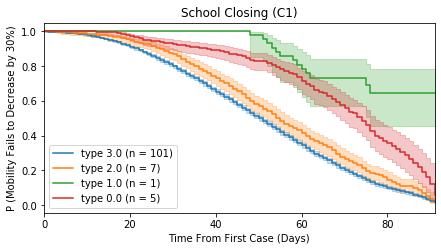

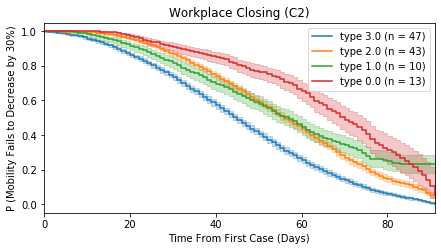

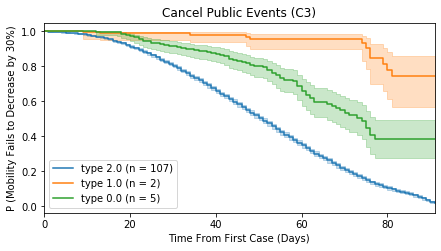

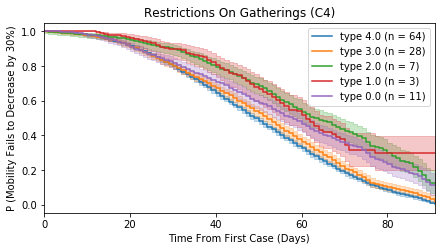

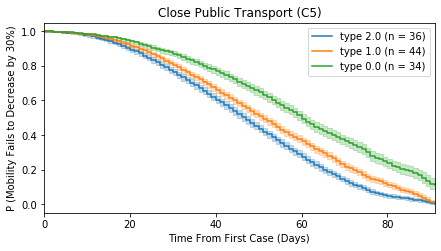

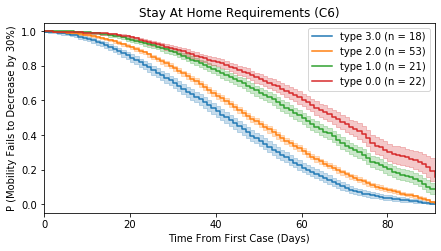

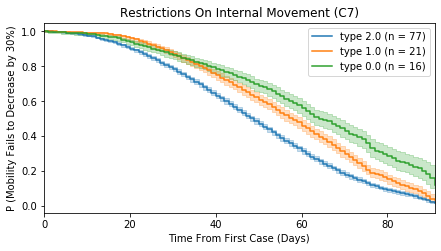

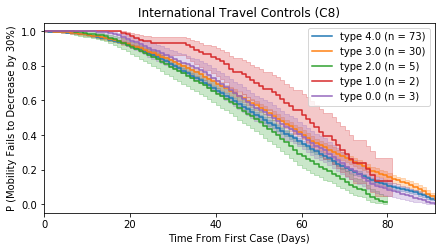

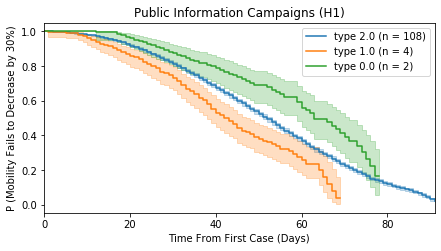

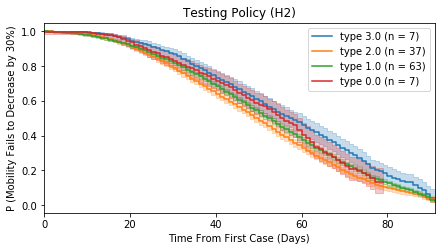

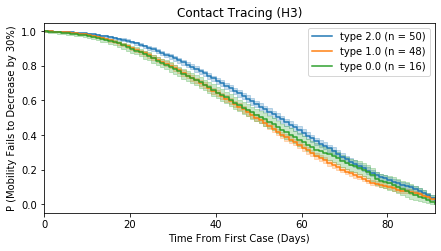

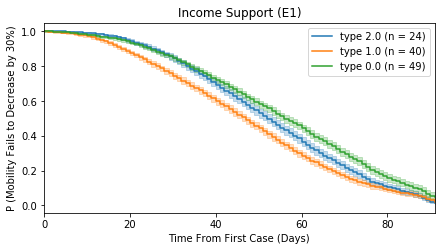

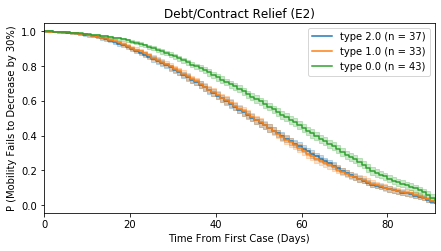

In [172]:
criteria = ['C1_School closing',
'C2_Workplace closing',  'C3_Cancel public events',
'C4_Restrictions on gatherings', 
'C5_Close public transport',  'C6_Stay at home requirements',
'C7_Restrictions on internal movement', 
'C8_International travel controls', 'H1_Public information campaigns',
'H2_Testing policy', 'H3_Contact tracing','E1_Income support', 
       'E2_Debt/contract relief']
for criterion in criteria: 
    print(criterion)
    kmf_mobility(criterion, threshold_type = 'mobility', threshold = -30, split_type = 'median')


C1_School closing


FileNotFoundError: [Errno 2] No such file or directory: 'kmf_outputs_cases/(C1_School closing)_50median.png'

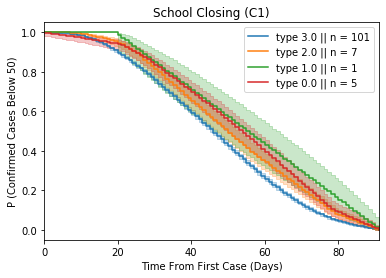

In [122]:
criteria = ['C1_School closing',
'C2_Workplace closing',  'C3_Cancel public events',
'C4_Restrictions on gatherings', 
'C5_Close public transport',  'C6_Stay at home requirements',
'C7_Restrictions on internal movement', 
'C8_International travel controls', 'H1_Public information campaigns',
'H2_Testing policy', 'H3_Contact tracing',
'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
'M1_Wildcard']

for criterion in criteria: 
    print(criterion)
    kmf_mobility(criterion, threshold_type = 'cases', threshold = 50, split_type = 'median')

In [ ]:
kmf_mobility(-30, 'C2_Workplace closing')